<a href="https://colab.research.google.com/github/wintera71/BEACO2N-Modules/blob/main/Lesson%203%3A%20Wildfires/IN_CLASS_Wildfires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BEACO2N Notebook 3a: Wildfires**

Notebook developed by: *Arushi Sharma, Anna Winter, Skye Pickett, Alec Morgan, Lan Dinh, Su Min Park, Amy Castillo*

### Learning Outcomes
Working through this notebook, you will learn about:
1. How PM2.5 and CO concentrations changed throughout the Orange Sky wildfire event in the Bay Area
1. Indices in a DataFrame
1. Creating and interpretting time series plots



## Table of Contents
1. Preview and Notebook Setup
>1.1 The Event
<br>1.2 Data Source
1. Introduction to Air Pollution Data
>2.1 The Berkeley Environmental Air Quality and CO2 Network (BEACO2N)
<br>2.2 Data Collection
<br>2.3 BEACO2N Data During a Wildfire Period
<br>2.4 Index in a DataFrame
1. Plotting CO and PM2.5 Concentrations
1. Describing Data


*Note: In this notebook, there are some more advanced topics that are "optional". This means you can just read over these sections; don't worry about fully understanding these parts unless you are really interested. They may be useful later in the course, but for now they are not necessary, so feel free to just skim the parts labelled "Optional"!*


<hr style="border: 2px solid #003262">
<hr style="border: 2px solid #C9B676">

## 1. Preview and Notebook Setup

###1.1 The Event
On Wednesday, September 9th, 2020, Bay Area residents woke up to an orange sky and general haze that lasted throughout the day. These conditions were caused by record-setting wildfires burning across the states of California, Colorado, Oregon, and Washington. The fires resulted in thick particle clouds that scattered blue wavelengths of light and left only reds and yellows, creating this odd red haze.


###1.2 Data Source

Let's take a look at how concentrations of pollutants changed in the air as a result of these wildfires using the [**Berkeley Environmental Air Quality and CO2 Network (BEACO2N)**](http://beacon.berkeley.edu/about/).



#### 1.2.1 Setting Up Our Notebook
 In this notebook, you'll be going over how to create some cool visualizations using the library we learned about in our last notebook, *pandas*.

*Reminder:* Pandas is a popular open-source data manipulation and analysis library for the Python programming language. It provides easy-to-use data structures and data analysis tools, making it a powerful tool for working with structured data.



Let's start by loading some packages we will need. Most of these we've learned about in our last two notebooks! Remember that they need to imported in any notebook we want to work in. **Run the cell below to import them.**

>*Reminder:* To run a cell...
* Click the **Play icon** in the left gutter of the cell **OR**
* Click **Shift+Enter** or **Shift+Return** on your computer keyboard to run the cell and move focus to the next cell

In [ ]:
## RUN THIS CELL
# Packages used for visualizations
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical computation tools
import numpy as np
from decimal import Decimal

# Manipulating data in form of Series or DataFrames
import pandas as pd

# Manipulating fields that are date or time
import datetime
from datetime import time

Since we're going to be creating visualizations in this notebook, it can be easiest to set some parameters in advance. Consider this like setting the stage for a show, so everything will be shown in the same view. **Run the cell below.** If any warning pops up, press "run anyway".

If you get any error saying "matplotlib is not defined", that means you haven't run the cell above this. Run that one *first* and the one below next.

In [ ]:

# Using this cell, we will be defining some matplotlib parameters for the plots that we will be creating.
matplotlib.rcParams['axes.linewidth'] = 1
matplotlib.rcParams['lines.linewidth'] = 3
matplotlib.rcParams['ytick.labelsize'] = 20
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['axes.titlesize'] = 20
matplotlib.rcParams['axes.labelsize'] = 20
plt.rcParams['figure.figsize'] = [20, 14]
plt.rcParams["axes.labelweight"] = "bold"
np.set_printoptions(suppress=True)
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["savefig.facecolor"]= '#FFFFFF'

***
## 2. Introduction to Air Quality and Greenhouse Gas Data

### 2.1 BEACO2N
The BEACO2N network provides a new strategy for understanding greenhouse gases (GHGs) and air quality at street level in near real time. This gives pedestrians, companies, and policy-makers unique insights into their GHG emissions and air quality experiences.

Through the low cost sensor network, BEACO2N is able to create **highly detailed maps** of CO2 and pollutants in our air. The data provides a clear route to **evaluating the effectiveness of local and regional efforts** to reduce GHG emissions, improve air quality, improve environmental equity, and reduce the detrimental effects of emissions on public health.

Feel free to check out the [website](http://beacon.berkeley.edu/metadata/) for more information about how the BEACO2N network works, cool visulizations, and data.


### 2.2 Data Collection
The BEACO2N network deploys low-cost air quality sensors -- called **"nodes"** --  approximately 2 kilometers apart from each other to measure 6 different pollutants and greenhouse gas (**CO2, NO, NO2, O3, CO, and PM2.5**). The nodes sample air at all times of day. Data from these sensors are collected once **every five seconds** onto a miniature computer which then sends the data to a centralized server, which makes the data available in near real time.

Although the individual nodes are less precise than the highly sensitive traditional sensors, when working as part of a network, the nodes create a highly detailed map of CO2 and other pollutants in our air.

#### 2.2.1 How We Store the Data
This data is saved as a **'.csv' file**. "csv" stands for "Comma Separated Values". A CSV file is a simple text file format used to store tabular data (meaning data that easily translates into a table), which is commonly used in data science. In a CSV file, each row represents a single **data record**, and each column represents a specific **attribute or feature of that record**.


CSV files can be easily read and written by many software tools, including Python libraries like *pandas*. CSV files are frequently used in data science because they are a lightweight, easy-to-use format for storing and sharing large amounts of data, and they can be easily processed and analyzed by many programming languages and tools.

### 2.3 BEACO2N Data During a Wildfire Period




In this section we will gain a better understanding of the data and investigate the question: <br>***How do CO and PM2.5 concentrations change during wildfire periods?***


First, we need to load the BEACO2N data into our Jupyter notebook. We will put the data in the form of a `DataFrame`. <br>*Reminder:* A `DataFrame` is a two-dimensional tabular data structure consisting of rows and columns, similar to a spreadsheet. These data structures are designed to handle large and complex datasets efficiently.

`pd.read_csv` **turns a csv file into a Dataframe!**

In [ ]:
# We'll start by pulling in the 2020 data.
filename_2020 = "http://128.32.208.8/node/31/measurements_all/csv?name=Fred%20T.%20Korematsu%20Elementary%20School&interval=60&variables=co_corrected,pm_pct_fs_corrected&start=2020-09-01%2012:00:00&end=2020-10-01%2012:00:00&chart_type=measurement"

# This function pulls in the data from the BEACO2N website into a dataframe so we can work with it.
data_2020  = pd.read_csv(filename_2020, on_bad_lines='skip')

## Run this cell

Let's take a look at CO and PM2.5 during the same dates for 2 different years. **We'll investigate September 2020 and September 2021. September 2020 was a wildfire period, while September 2021 did not have wildfires.**

In the cell below, we...<br>
(1) convert the "timestamp" column into the `datetime` format
<br>(2) put the "timestamp" column as the index
<br>(3) get rid of ("drop") the columns we're not looking at
<br>(4) rename the columns representing CO and PM2.5 values to have simpler names

*You don't need to understand **how** that was done quite yet, but read through the code below to understand which in which line each step is happening.*

In [ ]:
data_2020['timestamp']=pd.to_datetime(data_2020['local_timestamp'],format='%Y-%m-%d  %H:%M:%S') # Step 1
data_2020.index=data_2020['timestamp'] # Step 2
data_2020 = data_2020.drop(['local_timestamp','epoch','datetime','node_id','node_file_id','timestamp'],axis = 1) # Step 3
data_2020 = data_2020.rename(columns={'co_corrected': 'co', 'pm_pct_fs_corrected': 'pm'}) # Step 4
data_2020[:10]

,co,pm
timestamp,,
2020-09-01 12:00:00,0.191881,22.079435
2020-09-01 13:00:00,0.143395,15.444229
2020-09-01 14:00:00,0.133467,17.599275
2020-09-01 15:00:00,0.054624,10.063400
2020-09-01 16:00:00,0.036862,9.291733
2020-09-01 17:00:00,0.039488,10.939533
2020-09-01 18:00:00,0.060041,12.340852
2020-09-01 19:00:00,0.066448,9.492878
2020-09-01 20:00:00,0.074326,9.826910


The format of the timestamp column is `Year-Month-Date Hour:Minutes:Seconds`. <br>Look at the `timestamp` column in the `data_2020` DataFrame above. <br>**PRACTICE:** Based on what you see in the table and the fact that the *minimum* timestamp is `'2020-09-01 12:00:00'` and the *maximum* timestamp is `'2020-10-01 12:00:00'`, **what month of what year are the records in `data_2020` from? (ie, March 2002)**

*Double click on this cell and replace this text with your answer.*

**Now, let's pull in data from the year 2021 to compare to 2020.** We'll follow the same process for importing and cleaning up the data here.<br>**Run the cell below and read through each line to generally understand the steps occuring.**

In [ ]:
# We'll start by pulling in the 2021 data.
filename_2021 = "http://128.32.208.8/node/31/measurements_all/csv?name=Fred%20T.%20Korematsu%20Elementary%20School&interval=60&variables=co_corrected,pm_pct_fs_corrected&start=2021-09-01%2012:00:00&end=2021-10-01%2012:00:00&chart_type=measurement"

# This function pulls in the data from the BEACO2N website into a dataframe so we can work with it.
data_2021  = pd.read_csv(filename_2021, on_bad_lines='skip')

# Reformats and creates the timestamp index
data_2021['timestamp']=pd.to_datetime(data_2021['local_timestamp'],format='%Y-%m-%d  %H:%M:%S')
data_2021.index=data_2021['timestamp']
data_2021 = data_2021.drop(['local_timestamp','epoch','datetime','node_id','node_file_id','timestamp'],axis = 1)

# Renaming the columns of the dataframe
data_2021 = data_2021.rename(columns={'co_corrected': 'co', 'pm_pct_fs_corrected': 'pm'})
data_2021[:10]

,co,pm
timestamp,,
2021-09-01 12:00:00,0.092058,10.898234
2021-09-01 13:00:00,0.091732,11.580933
2021-09-01 14:00:00,0.114272,10.055393
2021-09-01 15:00:00,0.135507,9.608957
2021-09-01 16:00:00,0.138599,9.979824
2021-09-01 17:00:00,0.145980,9.946585
2021-09-01 18:00:00,0.147809,10.733164
2021-09-01 19:00:00,0.156371,12.954107
2021-09-01 20:00:00,0.174512,15.054365


**The `data_2021` DataFrame contains CO and PM2.5 data from *September 2021.***

### 2.4 Index in a DataFrame

When we create a DataFrame, **the far left column is called the index.** The index of a DataFrame is a **series of labels that identify each row**. This is commonly used for accessing certain rows in our data based on their label (the index).

To find the indices (*plural of index*) of our DataFrame, we can use the `.index` method. You can see it in the example below:

In [ ]:
# Run the cell to see the index of our dataset
data_2020.index

DatetimeIndex(['2020-09-01 12:00:00', '2020-09-01 13:00:00',
               '2020-09-01 14:00:00', '2020-09-01 15:00:00',
               '2020-09-01 16:00:00', '2020-09-01 17:00:00',
               '2020-09-01 18:00:00', '2020-09-01 19:00:00',
               '2020-09-01 20:00:00', '2020-09-01 21:00:00',
               ...
               '2020-10-01 03:00:00', '2020-10-01 04:00:00',
               '2020-10-01 05:00:00', '2020-10-01 06:00:00',
               '2020-10-01 07:00:00', '2020-10-01 08:00:00',
               '2020-10-01 09:00:00', '2020-10-01 10:00:00',
               '2020-10-01 11:00:00', '2020-10-01 12:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=721, freq=None)

**PRACTICE: In the cell below, return the index of the `data_2021` DataFrame. Follow the same format as above. Replace the `...` with your answer.**

In [ ]:
...

Ellipsis

***
## 3. Plotting CO and PM2.5 Concentrations

Now that we have the data from both years loaded, let's create plots using the Pandas `.plot` method.

We can make a **time series lineplot** of our data using the Pandas `.plot(<x_column>, <y_column>)` method.
We can (*and always should*) add axis labels and a title to our plot. In the code below, we plot the index of our DataFrame as the values on the x-axis, and the `co` column as the values on the y-axis. The code in the first line formats our graph using `figsize` (size of the graph figure).

Read through the code to see how we make the plot. You'll be making your own later on!
>**Syntax:** `plt.plot(<x_values>, <y_values>, <optional_arguments...>)`

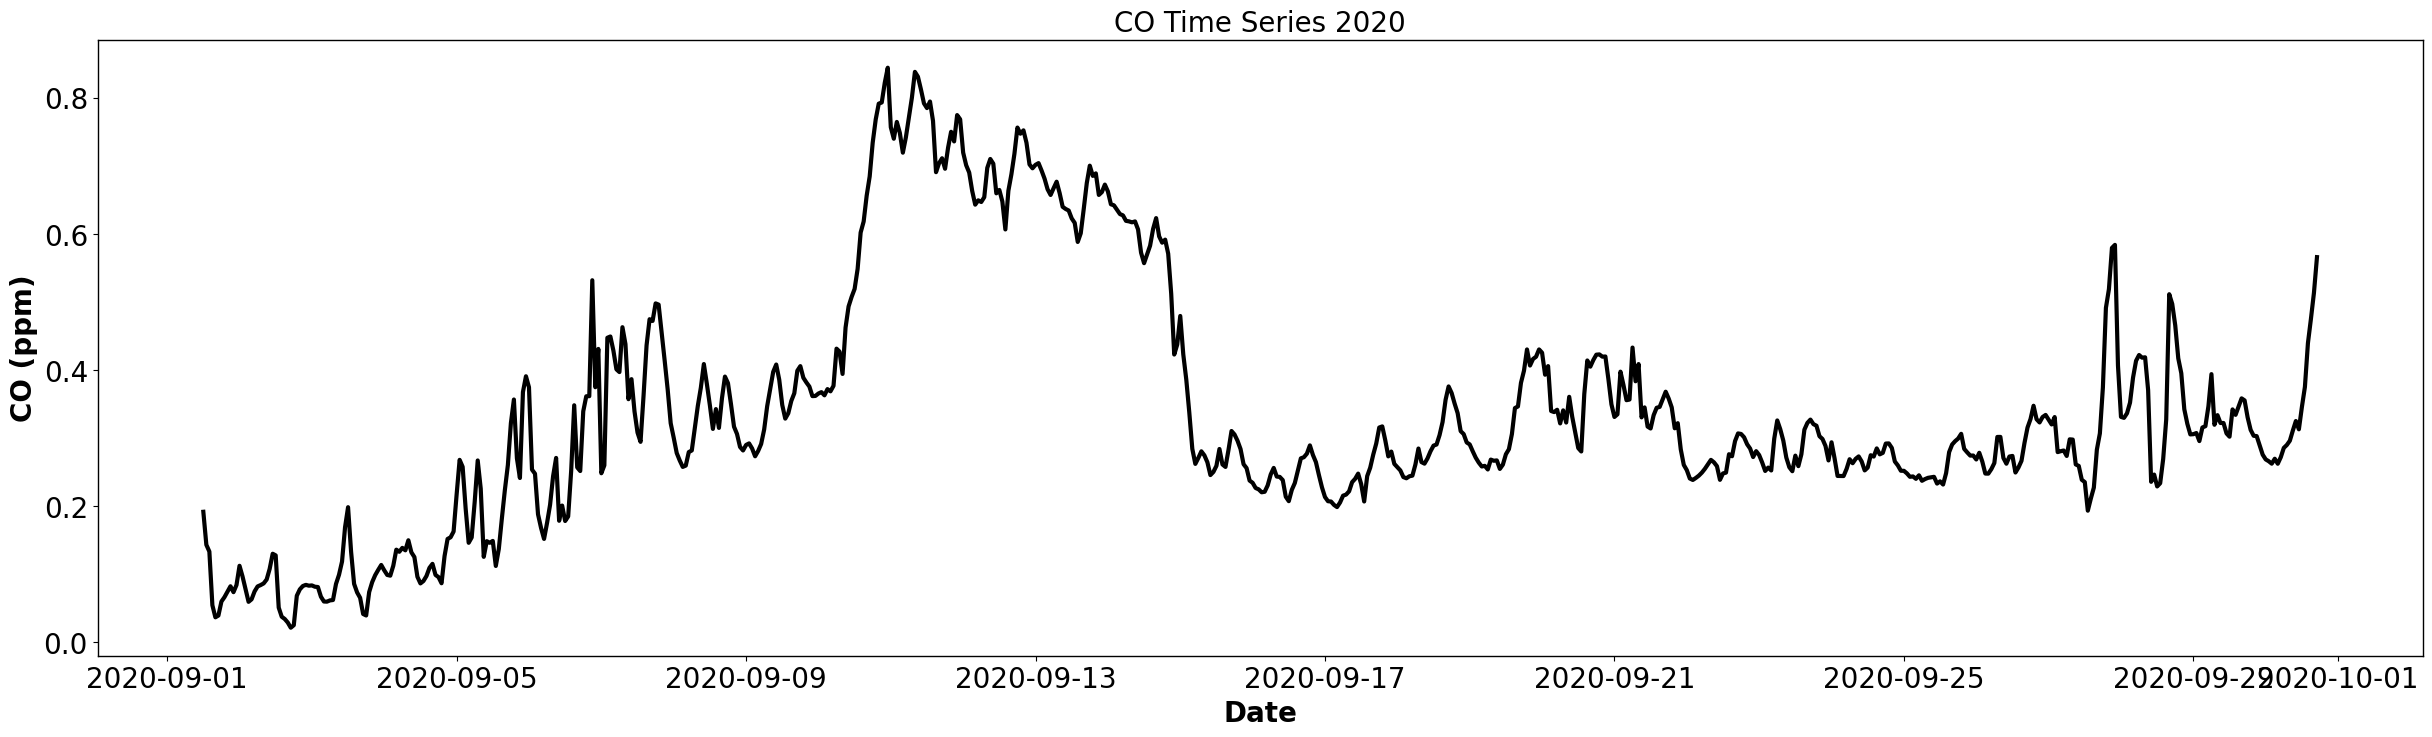

In [ ]:
# Sets the size of our figure
plt.figure(figsize = (30, 8))

# Plots the timestamp (index) on the x-axis, the CO concentrations ('co' column) on the y-axis, and makes the color of the line in the plot black
plt.plot(data_2020.index, data_2020['co'], color = 'black')

# Adds a x-axis label indicating what the values represent
plt.xlabel("Date")

# Adds a y-axis label indicating what the values represent
plt.ylabel("CO (ppm)")

# Adds a title to our line plot to clarify the meaning of the visualization
plt.title("CO Time Series 2020");


We see a spike in CO concentrations during the wildfire period in September 2020!<br><br>Let's take a look at the same dates from 2021 and see if we notice a difference in the plots. Like before, read through the code below for comprehension.

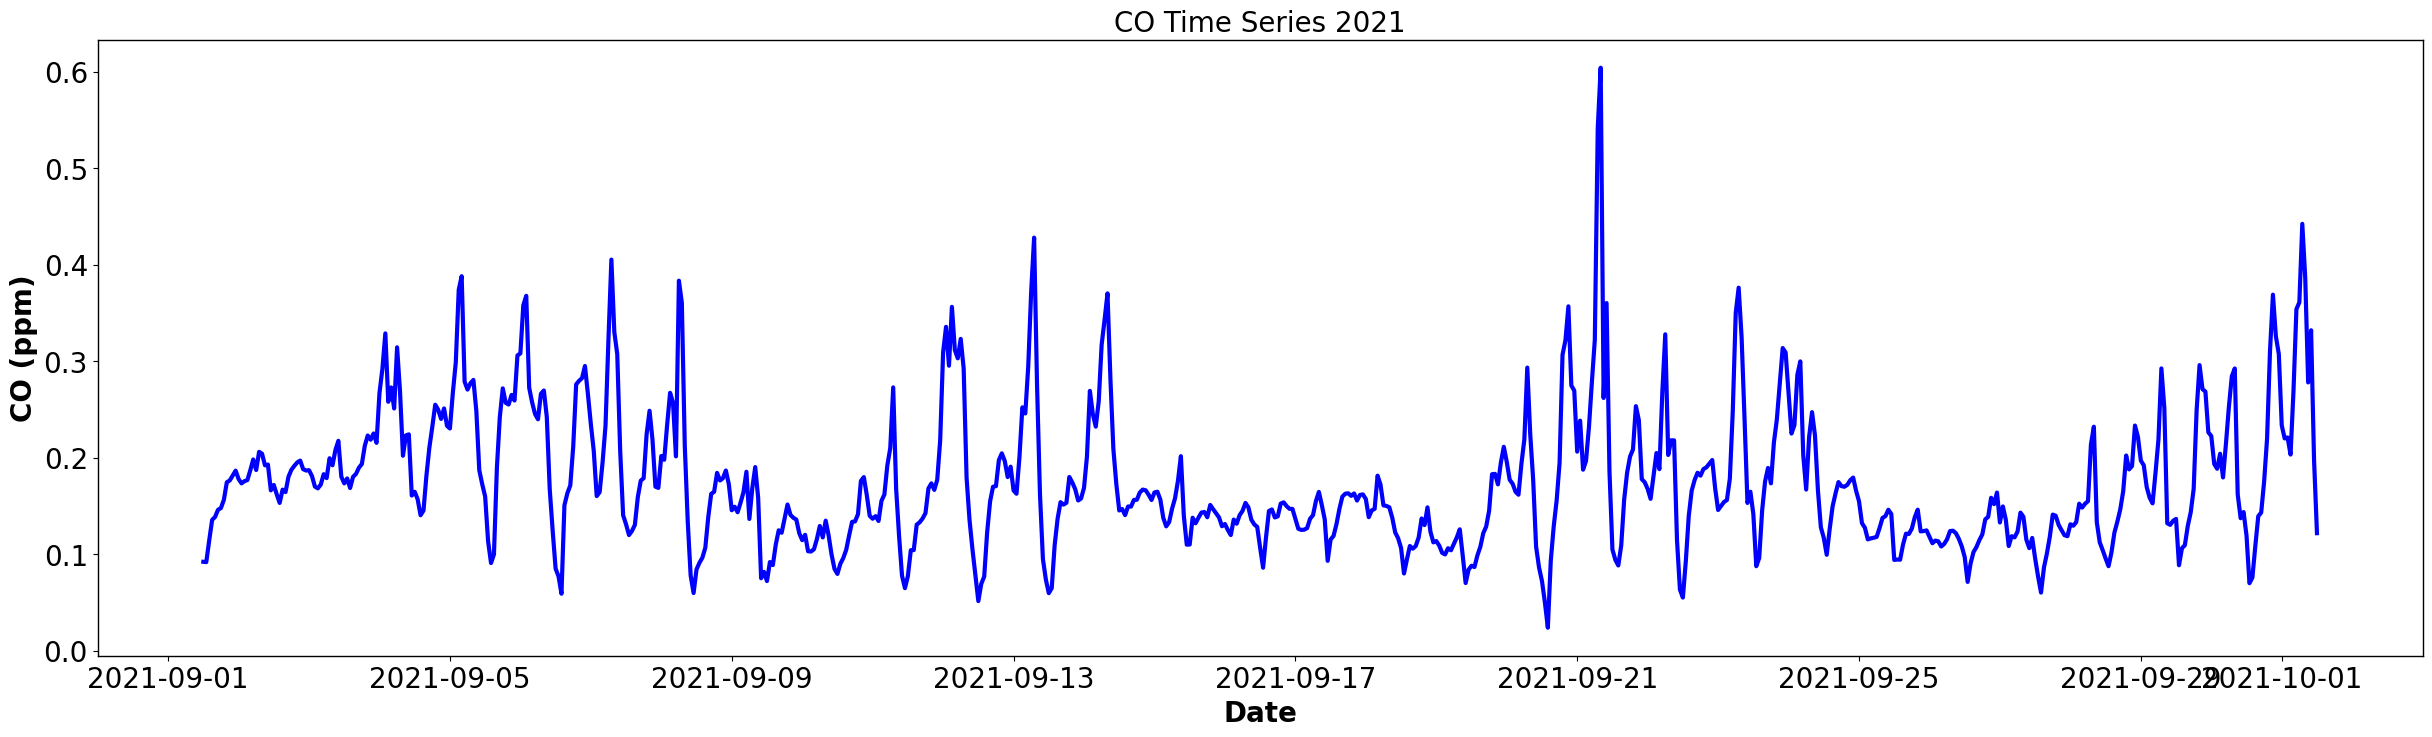

In [ ]:
# Sets the size of our figure
plt.figure(figsize = (30, 8))

# Plots the timestamp (index) on the x-axis, the CO concentrations ('co' column) on the y-axis, and makes the color of the line in the plot blue
plt.plot(data_2021.index, data_2021['co'], color = 'blue')

# Adds a x-axis label indicating what the values represent
plt.xlabel("Date")

# Adds a y-axis label indicating what the values represent
plt.ylabel("CO (ppm)")

# Adds a title to our line plot to clarify the meaning of the visualization
plt.title("CO Time Series 2021");


**PRACTICE:
How do the CO concentrations in September 2020 compare to the CO concentrations in September 2021?**

*Double click this cell and replace this text with a couple sentences about what you observe.*

Now let's take a look at the PM2.5 concentrations. We can use a similar code to the one we used above, but we want to change the column name to reference **PM2.5 concentrations** *instead of CO*. Let's start by looking at the ***2020 data***.

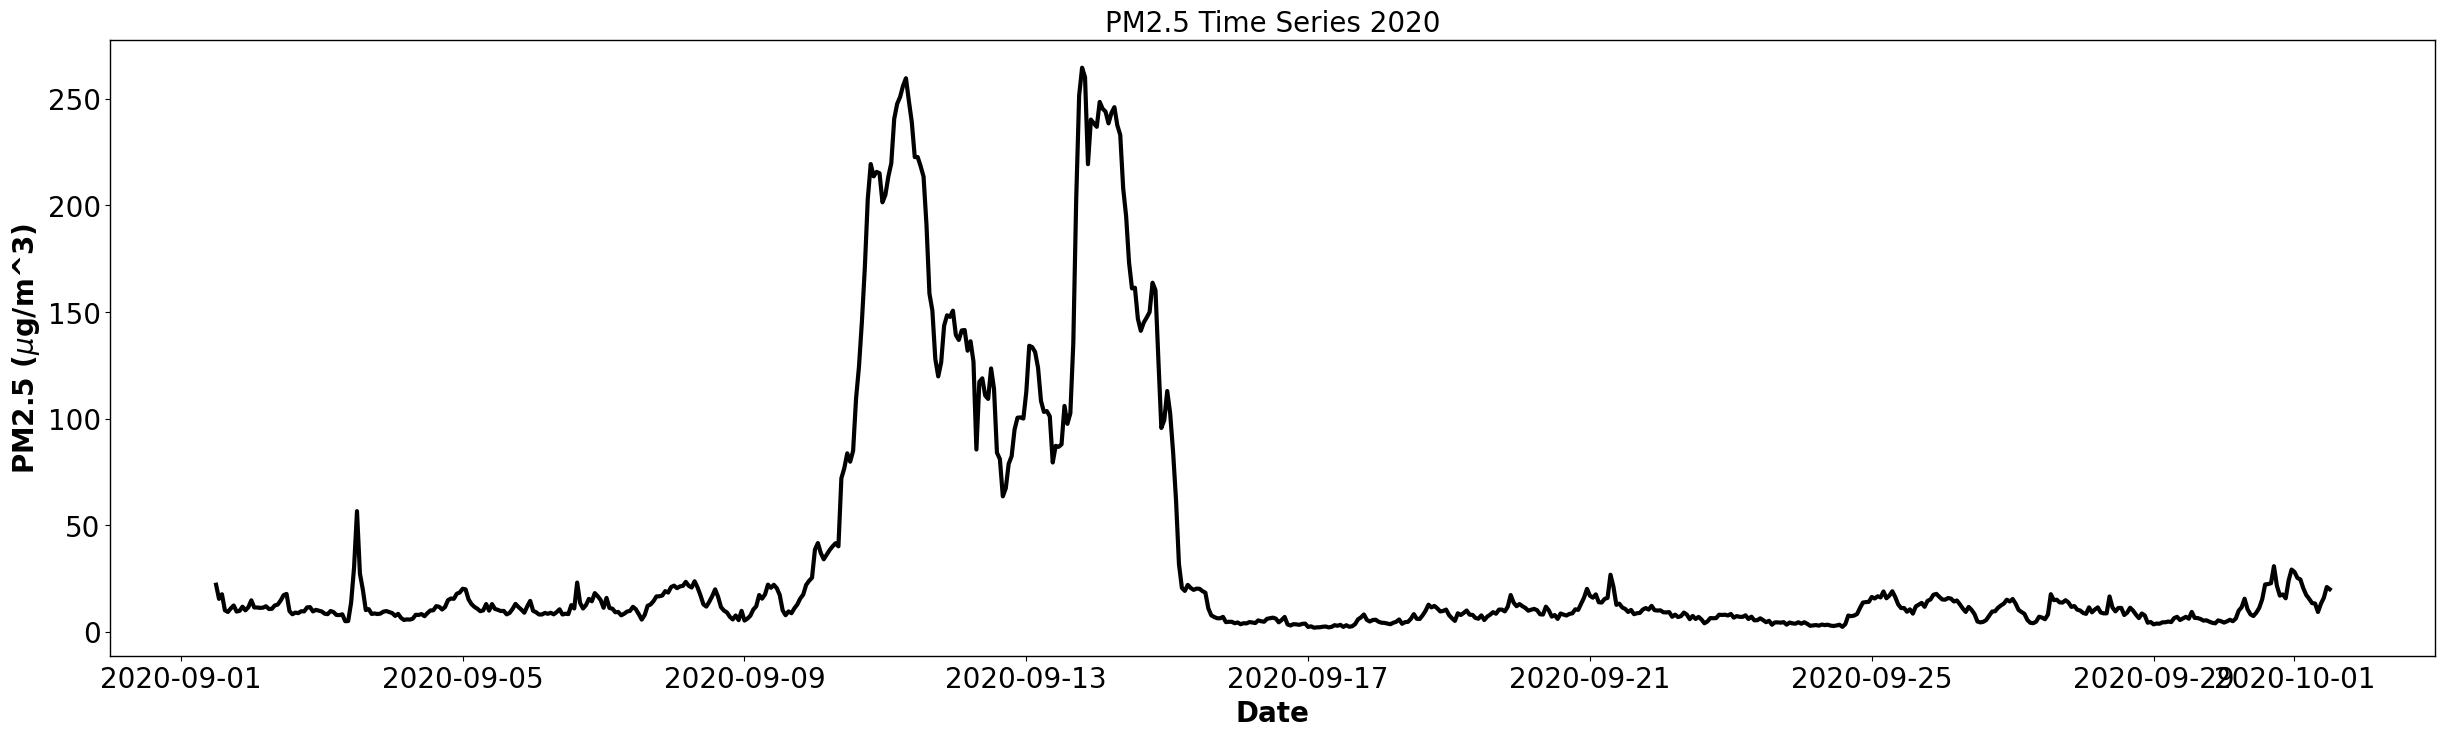

In [ ]:
# Sets the size of our figure
plt.figure(figsize = (30, 8))

# Plots the timestamp (index) on the x-axis, the PM2.5 concentrations ('pm' column) on the y-axis, and makes the color of the line black
plt.plot(data_2020.index, data_2020['pm'], color = 'black')

# Adds a x-axis label indicating what the values represent
plt.xlabel("Date")

# Adds a y-axis label indicating what the values represent
plt.ylabel("PM2.5 ($\mu$g/m^3)")

# Adds a title to our line plot to clarify the meaning of the visualization
plt.title("PM2.5 Time Series 2020");


Interesting! Now, let's take a look at the PM2.5 data **from 2021**.

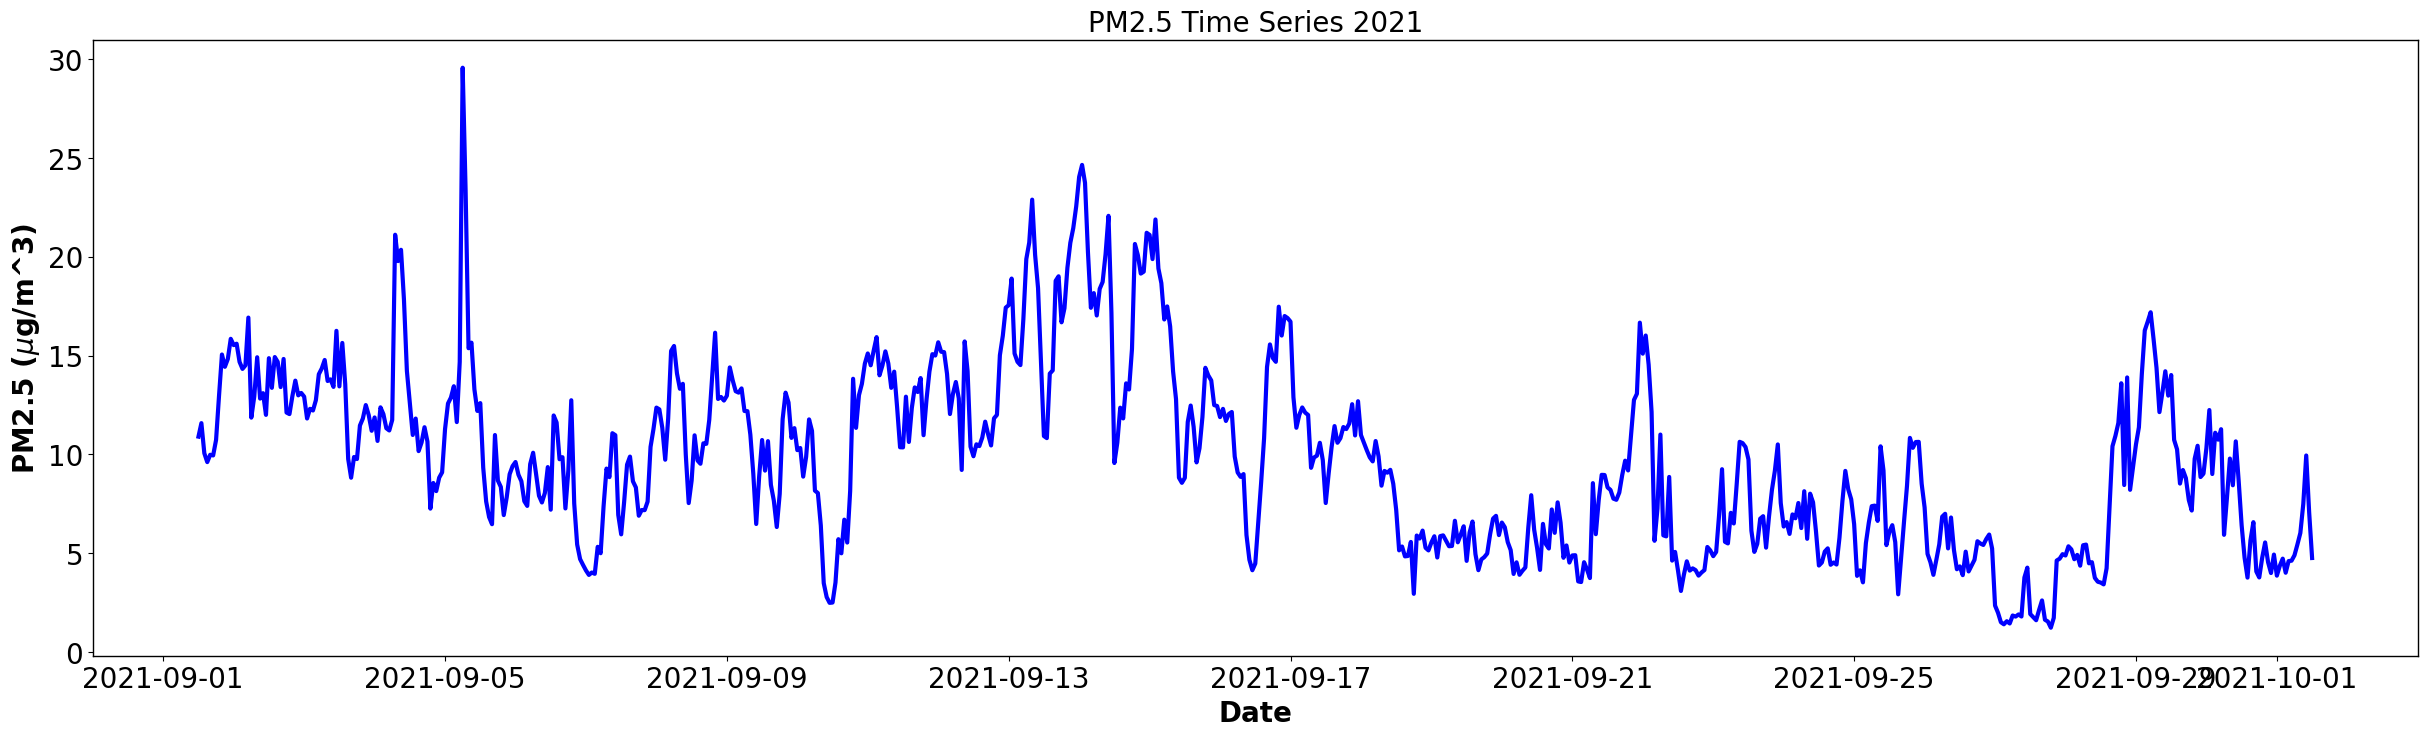

In [ ]:
# Sets the size of our figure
plt.figure(figsize = (30, 8))

# Plots the timestamp (index) on the x-axis, the PM2.5 concentrations ('pm' column) on the y-axis, and makes the color of the line blue
plt.plot(data_2021.index, data_2021['pm'], color = 'blue')

# Adds a x-axis label indicating what the values represent
plt.xlabel("Date")

# Adds a y-axis label indicating what the values represent
plt.ylabel("PM2.5 ($\mu$g/m^3)")

# Adds a title to our line plot to clarify the meaning of the visualization
plt.title("PM2.5 Time Series 2021");


**PRACTICE: How do the PM2.5 concentrations in September 2020 compare to the PM2.5 concentrations in September 2021?** (Notice the difference in scale between the y axes).

*Double click this cell and replace the words with a couple sentences about what you observe.*

***
## 4. Describing Data

The pandas library has useful methods that give us good insight to our data. One very helpful method is the `.describe()` method.<br>This method outputs a DataFrame that contains the following summary statistics of the dataset provided before the `.`:
* **count**: how many observations are in the dataset (i.e. the number of rows)
* **mean**: the average value of that column
* **std**: the standard deviation of the column's values
* **min**: the minimum value of that column
* **25%**: the lower (25%) quartile value
* **50%**: the middle (50%) quartile value (a.k.a. the median value)
* **75%**:the upper (75%) quartile value
* **max**:the maximum value of that column


**After running the following two cells, you should be able to see the summary statistics for the 2020 dataset and the 2021 dataset. Look at the differences in values in the wildfire year (2020) compared to the non-wildfire year (2021). *Think about any differences you see and what it could mean.***

In [ ]:
# 2020 summary statistics
data_2020.describe()

,co,pm
count,702.000000,721.000000
mean,0.337725,33.864715
std,0.175086,58.296780
min,0.021576,1.902628
25%,0.247940,7.312346
50%,0.294308,10.539216
75%,0.390883,18.340036
max,0.844240,264.596459


In [ ]:
# 2021 summary statistics
data_2021.describe()

,co,pm
count,721.000000,721.000000
mean,0.174429,9.750977
std,0.071732,4.596353
min,0.023726,1.225836
25%,0.126306,5.862546
50%,0.160443,9.526183
75%,0.203238,12.765967
max,0.604266,29.571532


#### It's time to analyze our graphs and data!

Analyze the difference of the summary statistics of both the 2020 and 2021 years and take a look at the graphs of the concentrations of the CO and PM2.5 pollutants for both 2020 (black plots) and 2021 (blue plots). **In the cell below, answer these questions:**
1. What do the time series visualizations and summary statistics tell you about the effect of wildfires? *Remember September 2020 was a wildfire period, while September 2021 was not.*
1. Why are time series visualizations like this important?
1. Why are summary statistics important to look at as well?

*Double-click to edit this cell and replace the below text with your answer.*
1. (Your response here)
2. (Your response here)
3. (Your response here)

***
#### You've finished with the **Wildfires *In Class* notebook** and are ready to begin the **Wildfires *Student Exploration* notebook**! Good job!